In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading Data set
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Null value checking
null_count=df.isna().sum()
print(null_count)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_34468\3153864352.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


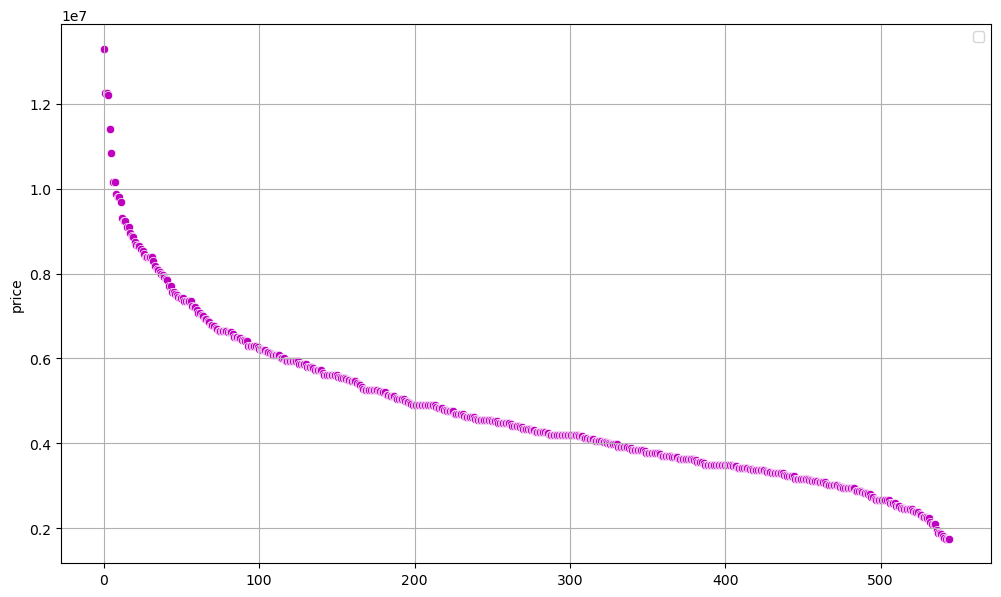

In [4]:
#Ploting price
plt.figure(figsize=(12,7))
sns .scatterplot(df['price'],color='m',markers='o')
plt.grid(True)
plt.legend() 
plt.show()

In [5]:
df.shape

(545, 13)

In [6]:
#number of categorial variables
obj=(df.dtypes=='object')
obj_cols=list(obj[obj.index])
print('categorial variables:',len(obj_cols))

#number of integer variables
int_=(df.dtypes=='int')
int_cols=list(int_[int_.index])
print('Integer variables:',len(int_cols))

categorial variables: 13
Integer variables: 13


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_34468\1814346285.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Count'>

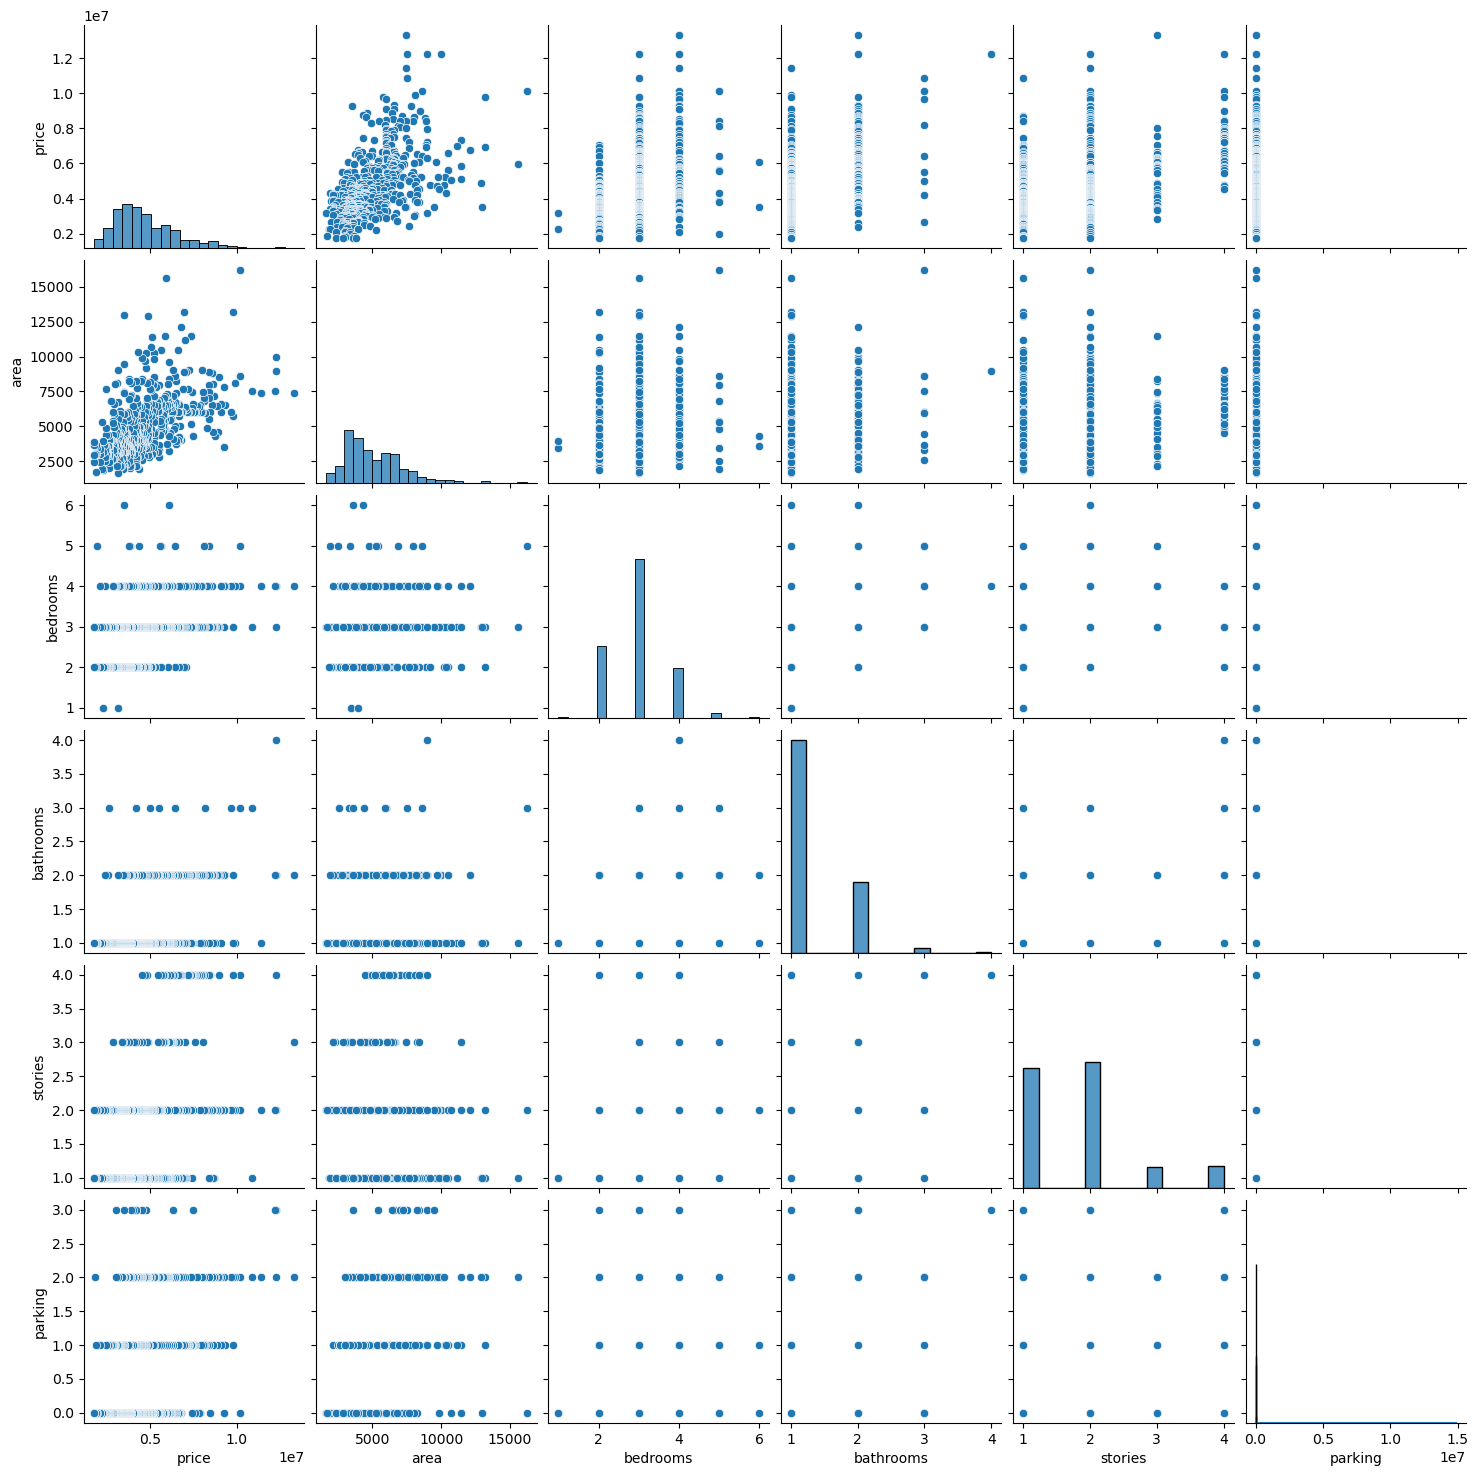

In [9]:
sns.pairplot(df)
sns.distplot(df['price'])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
#seperating the features and dependent variables
features=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
target=['price']

#one hot_encoding
df_encoded = pd.get_dummies(df, columns=features, drop_first=True)

In [12]:
X = df_encoded.drop('price', axis=1).values  # Feature matrix
y = df_encoded['price'].values.reshape(-1, 1)  # Target variable reshaped to a column vector
print(y[:5])
print(X[:5])


[[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]]
[[False False False ...  True False False]
 [False False False ... False False False]
 [False False False ...  True  True False]
 [False False False ...  True False False]
 [False False False ... False False False]]


In [13]:
#normalizing features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
print(X[:5])



[[-0.04287465 -0.04287465 -0.04287465 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [-0.04287465 -0.04287465 -0.04287465 ... -0.55403469 -0.84488844
  -0.6964292 ]
 [-0.04287465 -0.04287465 -0.04287465 ...  1.80494113  1.18358821
  -0.6964292 ]
 [-0.04287465 -0.04287465 -0.04287465 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [-0.04287465 -0.04287465 -0.04287465 ... -0.55403469 -0.84488844
  -0.6964292 ]]


In [14]:
# Add a column of ones to X
X = np.c_[np.ones((X.shape[0], 1)), X]  
print(X[:5])


[[ 1.         -0.04287465 -0.04287465 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.         -0.04287465 -0.04287465 ... -0.55403469 -0.84488844
  -0.6964292 ]
 [ 1.         -0.04287465 -0.04287465 ...  1.80494113  1.18358821
  -0.6964292 ]
 [ 1.         -0.04287465 -0.04287465 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.         -0.04287465 -0.04287465 ... -0.55403469 -0.84488844
  -0.6964292 ]]


In [15]:
#linear regression model
class linear_regression:
    def __init__(self,learning_rate=0.1,number_of_iteration=100):
        self.lr = learning_rate
        self.n = number_of_iteration
        self.weights = None  # To store slop empty variables
        
    #this function uses gradient descendent for minimizing weights
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))  # Initialize weights with zeros
        
        #gradient descendent logic
        for _ in range(self.n):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            gradients = (2 / n_samples) * np.dot(X.T, error)
            self.weights -= self.lr * gradients
            
    #prediction function
    def predict(self, X):
        return np.dot(X, self.weights)

        

In [16]:
#model
model=linear_regression(learning_rate=0.1,number_of_iteration=5000)
model.fit(X,y)

In [28]:
#model validation
y_pred = model.predict(X)

def rmse(y_true, y_pred):
   rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
   return (rmse / np.mean(y_true)) * 100


def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

print("RMSE(%):", rmse(y, y_pred))
print("R² Score:", r2_score(y, y_pred))




RMSE(%): 13.245558718595598
R² Score: 0.8858458376294747


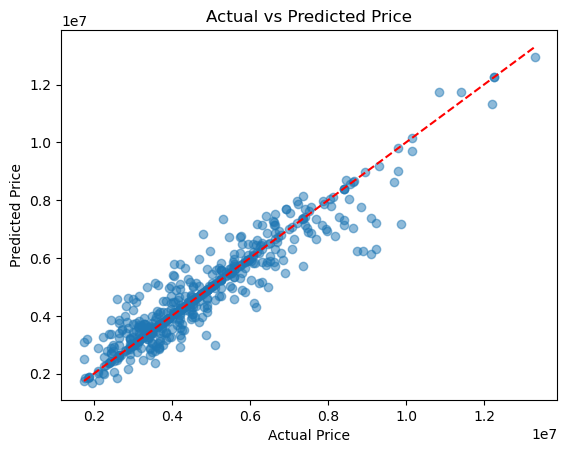

In [23]:
#visualizing prediction
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.show()
